This notebook plots gene set enrichment results (`outputs/sgc_pangenome_catlases_corncob_annotation_analysis`). 
Dominating set pieces that were differentially abundant were annotated via multifasta queries. 
The multifasta file was annotated by eggnog, and the annotations were all combined. 
Then, KEGG enrichment analysis was performed on all species. 

In [17]:
# adjust plot size rendered inline
options(repr.plot.width = 6.5, repr.plot.height = 10, repr.plot.res = 300)

In [3]:
setwd("..")

In [7]:
library(dplyr)
library(ggplot2)
library(readr)
library(purrr)
library(aplot)

In [8]:
# function to produce enrichment plots
plot_enrichment_results <- function(enrichment_df, plt_title) {
  ggplot(enrichment_df, aes(x = reorder(Description, Count), y = as.numeric(Count), 
                            color = species)) +
    geom_point(alpha = .5) +
    theme_classic() +
    coord_flip()+
    ylim(0, 100) +
    theme(legend.position = "right",
          axis.title.y = element_blank(),
          axis.text.y = element_text(size = 6),
          plot.title.position =  "plot",
          plot.title = element_text(size = 8),
          axis.text.x = element_text(size = 6),
          axis.title.x = element_blank()) +
    labs(y = "count", title = plt_title)  +
    scale_color_brewer(palette = "Paired", 
                       labels = c(expression(italic("Enterocloster bolteae")),
                                  expression(italic("Enterocloster clostridioformis")), 
                                  expression(italic("Enterocloster clostridioformis_A")), 
                                  expression(italic("Enterocloster sp005845215")),
                                  expression(italic("Ruminococcus_B gnavus"))))
}

In [13]:
# read in enrichment results for KOs that were distinctly increased or decreased in abundance (not both)
enriched_results <- Sys.glob("outputs/sgc_pangenome_catlases_corncob_annotation_analysis/*distinct_enriched.tsv") %>%
  map_dfr(read_tsv, show_col_types = F) %>%
  filter(p.adjust < 0.05) %>%
  mutate(set_size = as.numeric(gsub("*.\\/", "", GeneRatio)),
         gene_fraction = as.numeric(Count/set_size))

enriched_results_up <- enriched_results %>%
  filter(abundance == "increased")

enriched_results_down <- enriched_results %>%
  filter(abundance == "decreased")

In [10]:
# plot
enriched_up_plt <- plot_enrichment_results(enrichment_df = enriched_results_up,
                                           plt_title = "increased abundance")

enriched_down_plt <- plot_enrichment_results(enrichment_df = enriched_results_down,
                                             plt_title = "decreased abundance")

In [14]:
# read in KOs that were annotated in dom set pieces that were increased and decreased in abundance
enriched_results_overlapping <- Sys.glob("outputs/sgc_pangenome_catlases_corncob_annotation_analysis/*overlapping_enriched.tsv") %>%
  map_dfr(read_tsv, show_col_types = F) %>%
  filter(p.adjust < 0.05) %>%
  mutate(set_size = as.numeric(gsub("*.\\/", "", GeneRatio)),
         gene_fraction = as.numeric(Count/set_size))

In [15]:
# plot
enriched_overlapping_plt <- plot_enrichment_results(enrichment_df = enriched_results_overlapping,
                                             plt_title = "increased & decreased abundance")

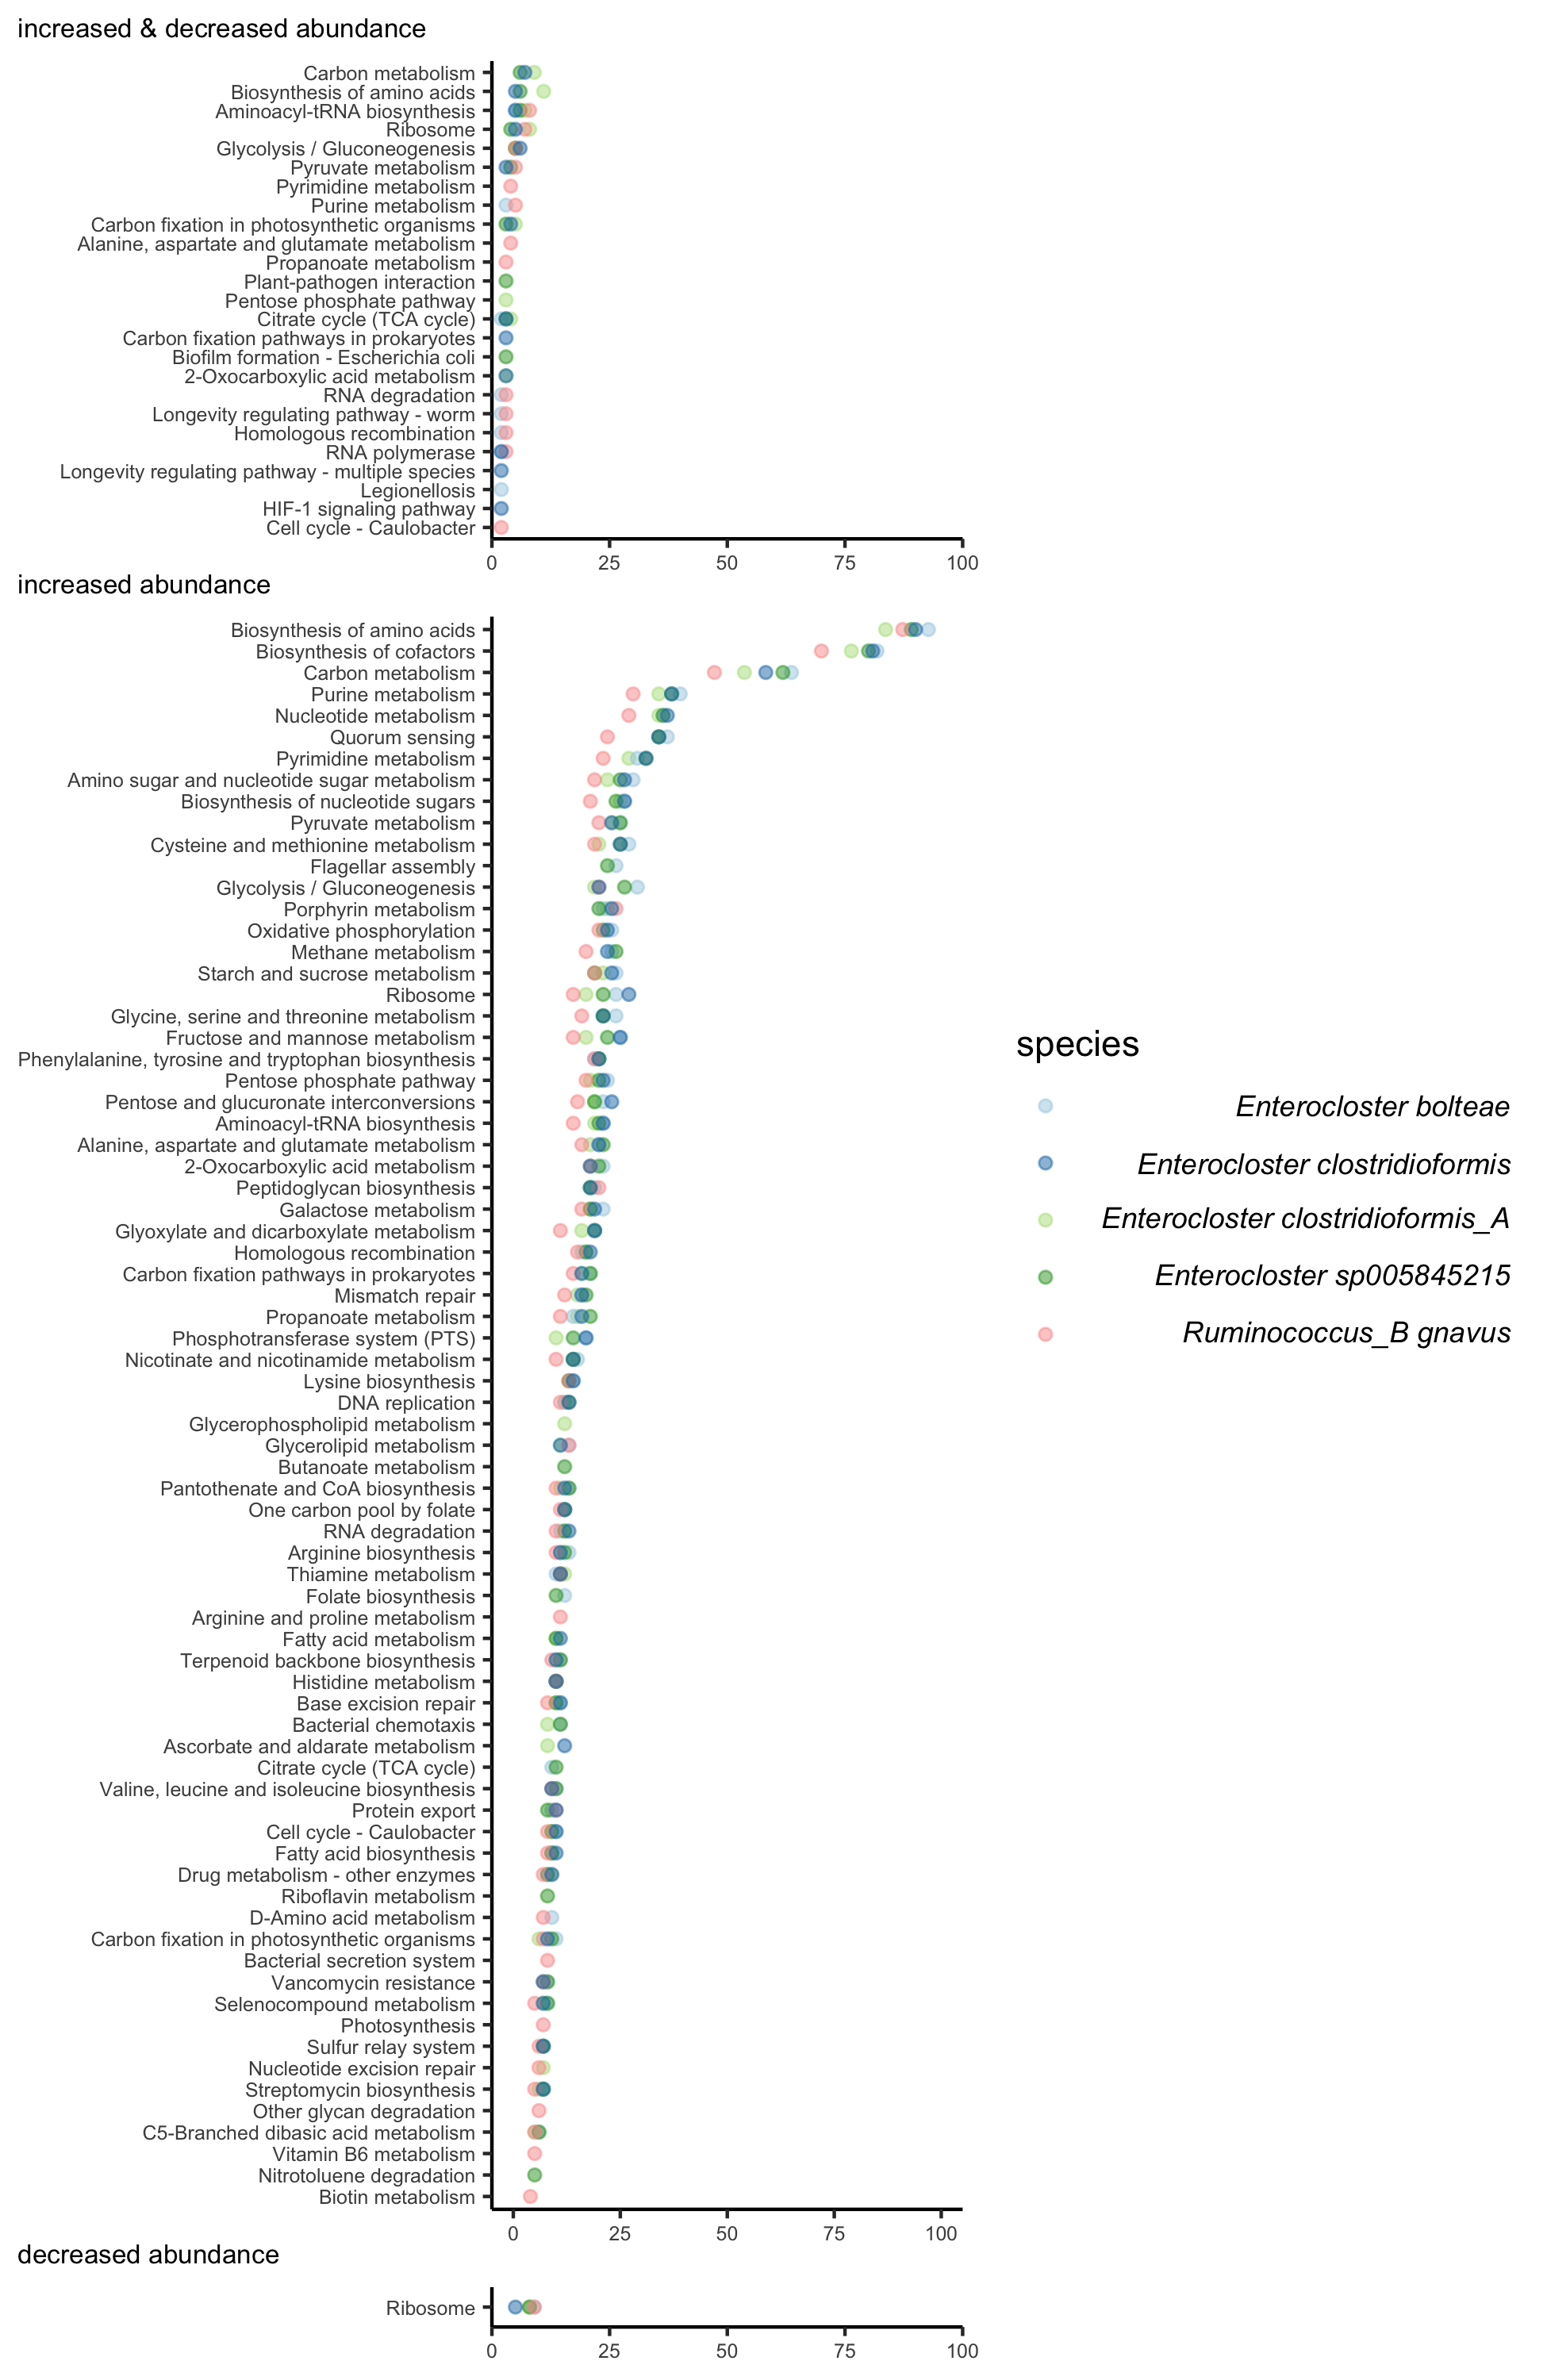

In [18]:
# combine plots together
#pdf("sig_ccs_enrichment.pdf", height = 10, width = 6.5)
enriched_up_plt %>% 
  insert_bottom(enriched_down_plt, height = .025) %>% 
  insert_top(enriched_overlapping_plt, height = 0.3)
#dev.off()
